In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import shapiro
from statsmodels.stats.multitest import multipletests

In [2]:
# Load the data
name = 'CloudResearch-1_24.08.12'
df = pd.read_csv('/work/Processed Data/' + name + '_processed.csv')

In [3]:
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')

In [4]:
# Dictionary to rename variables to more readable names
rename_dict = {'Frequency_Score_centered': 'Chatbot Usage Frequency',
 'Session_Length_Score_centered': 'Chatbot Session Length',
 'ULS_8_centered': 'Loneliness (ULS-8)',
 'SUS_Avg_centered': 'System Usability (SUS)',
 'BFI_Extraversion_centered': 'Extraversion (BFI-10)',
 'BFI_Neurotic_centered': 'Neuroticism (BFI-10)',
 'BFI_Agreeableness_centered': 'Agreeableness (BFI-10)',
 'BFI_Conscientious_centered': 'Conscientiousness (BFI-10)',
 'BFI_Openness_centered': 'Openness (BFI-10)',
 'LSNS_Score_centered': 'Socialization (LSNS)',
 'MSPSS_Score_centered': 'Perceived Social Support (MSPSS)',
 'B_RSES_Score_centered': 'Self-Esteem (B-RSES)',
 'AI_Attitudes_Score_centered': 'Attitudes towards AI',
 'C_State_Empathy_centered': 'State Empathy towards Chatbot',
 'C_SEmp_Affective_centered': 'Affective State Empathy towards Chatbot',
 'C_SEmp_Cognitive_centered': 'Cognitive State Empathy towards Chatbot',
 'C_SEmp_Associative_centered': 'Associative State Empathy towards Chatbot',
 'C_Social_Attract_centered': 'Social Attraction towards Chatbot',
 'C_Phys_Attract_centered': 'Physical Attraction towards Chatbot',
 'C_Task_Attract_centered': 'Task Attraction towards Chatbot',
 'C_Homophily_centered': 'Perceived Similarity with Chatbot',
 'C_Attrib_Conf_centered': 'Perceived Chatbot Predictability',
 'HCI_HHI_Expectation_centered': 'Expectations towards Chatbot (HCI/HHI)',
 'HCI_HHI_Trust_centered': 'Trust towards Chatbot (HCI/HHI)',
 'HCI_HHI_Substitution_centered': 'Preference for Chatbot over Humans (HCI/HHI)',
 'HHI_Trust___Unfam_centered': 'Trust in Unfamiliar People (HHI)',
 'HHI_CommIntent___Unfam_centered': 'Willingness to Engage with Unfamiliar People (HHI)',
 'HHI_Trust___Familiar_centered': 'Trust in Familiar People (HHI)',
 'HHI_CommIntent___Familiar_centered': 'Willingness to Engage with Familiar People (HHI)',
 'H_State_Empathy_centered': 'State Empathy towards Close Person',
 'H_SEmp_Affective_centered': 'Affective State Empathy towards Close Person',
 'H_SEmp_Cognitive_centered': 'Cognitive State Empathy towards Close Person',
 'H_SEmp_Associative_centered': 'Associative State Empathy towards Close Person',
 'H_Social_Attract_centered': 'Social Attraction towards towards Close Person',
 'H_Task_Attract_centered': 'Task Attraction towards towards Close Person',
 'H_Homophily_centered': 'Perceived Similarity with Close Person',
 'Age_centered': 'Age',
 'GPIUS2_centered': 'Problematic Use of Chatbot (GPIUS-2)',
 'Relation_Effect_1_centered': 'Chatbot Effect: Less Interaction with People',
 'Relation_Effect_2_centered': 'Chatbot Effect: Shift in Conversation Topics with People',
 'Relation_Effect_3_centered': 'Chatbot Effect: Easier to Talk to People',
 'Relation_Effect_4_centered': 'Chatbot Effect: More Enjoyable to Talk to People',
 'Relation_Effect_5_centered': 'Chatbot Effect: Less Engaging to Talk to People',
 'Relation_Effect_6_centered': 'Chatbot Effect: Less Interest in Talking to People'}

In [5]:
# List of variables
variables = ['Frequency Score', 'Session Length Score', 
                    'ULS-8', 'GPIUS2', 'SUS Avg', 'BFI Extraversion', 'BFI Neurotic', 'BFI Agreeableness', 
                    'BFI Conscientious', 'BFI Openness', 'LSNS Score', 'MSPSS Score', 'B-RSES Score', 
                    'AI Attitudes Score', 'C State Empathy', 'C SEmp Affective', 'C SEmp Cognitive', 
                    'C SEmp Associative', 'C Social Attract', 'C Phys Attract', 'C Task Attract', 
                    'C Homophily', 'C Attrib Conf', 'Relation_Effect_1', 'Relation_Effect_2', 'Relation_Effect_3', 'Relation_Effect_4', 
                    'Relation_Effect_5', 'Relation_Effect_6', 
                    'HCI-HHI Expectation', 'HCI-HHI Trust', 
                    'HCI-HHI Substitution', 'HHI Trust - Unfam', 'HHI CommIntent - Unfam', 
                    'HHI Trust - Familiar', 'HHI CommIntent - Familiar', 'H State Empathy', 
                    'H SEmp Affective', 'H SEmp Cognitive', 'H SEmp Associative', 'H Social Attract', 
                    'H Task Attract', 'H Homophily', 'Age']

# Replace spaces and hyphens in variable names
variables = [var.replace(' ', '_').replace('-', '_') for var in variables]
var_centered = [var + '_centered' for var in variables]

key_variables = ['Session_Length_Score_centered', 'ULS_8_centered', 'GPIUS2_centered']

print(var_centered)

# Standardize the data
scaler = StandardScaler()
df[var_centered] = scaler.fit_transform(df[variables])

['Frequency_Score_centered', 'Session_Length_Score_centered', 'ULS_8_centered', 'GPIUS2_centered', 'SUS_Avg_centered', 'BFI_Extraversion_centered', 'BFI_Neurotic_centered', 'BFI_Agreeableness_centered', 'BFI_Conscientious_centered', 'BFI_Openness_centered', 'LSNS_Score_centered', 'MSPSS_Score_centered', 'B_RSES_Score_centered', 'AI_Attitudes_Score_centered', 'C_State_Empathy_centered', 'C_SEmp_Affective_centered', 'C_SEmp_Cognitive_centered', 'C_SEmp_Associative_centered', 'C_Social_Attract_centered', 'C_Phys_Attract_centered', 'C_Task_Attract_centered', 'C_Homophily_centered', 'C_Attrib_Conf_centered', 'Relation_Effect_1_centered', 'Relation_Effect_2_centered', 'Relation_Effect_3_centered', 'Relation_Effect_4_centered', 'Relation_Effect_5_centered', 'Relation_Effect_6_centered', 'HCI_HHI_Expectation_centered', 'HCI_HHI_Trust_centered', 'HCI_HHI_Substitution_centered', 'HHI_Trust___Unfam_centered', 'HHI_CommIntent___Unfam_centered', 'HHI_Trust___Familiar_centered', 'HHI_CommIntent___Fa

In [6]:
# Check data
df[var_centered].describe()

,Frequency_Score_centered,Session_Length_Score_centered,ULS_8_centered,GPIUS2_centered,SUS_Avg_centered,BFI_Extraversion_centered,BFI_Neurotic_centered,BFI_Agreeableness_centered,BFI_Conscientious_centered,BFI_Openness_centered,...,HHI_Trust___Familiar_centered,HHI_CommIntent___Familiar_centered,H_State_Empathy_centered,H_SEmp_Affective_centered,H_SEmp_Cognitive_centered,H_SEmp_Associative_centered,H_Social_Attract_centered,H_Task_Attract_centered,H_Homophily_centered,Age_centered
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,...,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,1.275108e-16,-4.396923e-17,-1.934646e-16,-1.846708e-16,2.638154e-16,1.121215e-16,1.450985e-16,4.836615e-17,-2.341361e-16,-8.793846e-17,...,-2.066554e-16,9.893076e-17,5.759969e-16,2.418308e-16,4.308984e-16,-2.682123e-16,-2.770061e-16,-1.758769e-17,-7.760569e-16,2.374338e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,...,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-1.925119e+00,-1.014723e+00,-1.792966e+00,-1.394208e+00,-3.426758e+00,-1.679291e+00,-1.692860e+00,-1.450706e+00,-3.095353e+00,-3.092336e+00,...,-3.732899e+00,-3.554573e+00,-5.316461e+00,-4.870686e+00,-5.426415e+00,-4.578349e+00,-3.755138e+00,-4.051904e+00,-4.128058e+00,-1.663251e+00
25%,-5.550401e-01,-1.014723e+00,-7.777476e-01,-8.794627e-01,-6.925855e-01,-4.634603e-01,-8.052344e-01,-9.623020e-01,-5.093789e-01,-8.986506e-01,...,-5.096210e-01,-4.579746e-01,-4.931431e-01,-3.874725e-01,-6.249440e-01,-3.785693e-01,-8.505747e-01,-7.215720e-01,-5.459321e-01,-6.586860e-01
50%,1.299992e-01,1.099631e-01,6.826756e-02,-1.073448e-01,-4.501829e-02,1.444552e-01,8.239097e-02,1.450706e-02,1.711405e-01,1.981918e-01,...,2.961985e-01,3.161749e-01,1.767621e-01,-1.387133e-02,1.753012e-01,-2.858761e-02,2.665650e-01,1.665166e-01,1.363775e-01,-2.568602e-01
75%,8.150385e-01,1.099631e-01,7.450797e-01,6.647731e-01,8.184047e-01,7.523707e-01,6.371569e-01,5.029116e-01,7.155561e-01,7.466131e-01,...,6.991083e-01,7.032497e-01,7.126863e-01,7.333309e-01,9.755464e-01,1.021357e+00,9.368489e-01,8.325831e-01,6.481097e-01,5.467915e-01
max,8.150385e-01,4.608708e+00,2.267907e+00,3.238499e+00,2.082703e+00,3.184033e+00,1.857642e+00,2.456530e+00,1.259972e+00,1.295034e+00,...,1.102018e+00,1.090324e+00,1.114629e+00,1.106932e+00,9.755464e-01,1.021357e+00,9.368489e-01,1.054605e+00,1.671574e+00,3.861855e+00


In [7]:
# Check different correlation methods
correlation_pearson = df[var_centered].corr(method='pearson', min_periods=1)
correlation_spearman = df[var_centered].corr(method='spearman', min_periods=1)
correlation_kendall = df[var_centered].corr(method='kendall', min_periods=1)

# Compare the results
diff_spearman_pearson = correlation_spearman - correlation_pearson
diff_kendall_pearson = correlation_kendall - correlation_pearson

print("Largest differences between Spearman and Pearson:")
print(diff_spearman_pearson.abs().unstack().nlargest(10))

print("\nLargest differences between Kendall and Pearson:")
print(diff_kendall_pearson.abs().unstack().nlargest(10))

Largest differences between Spearman and Pearson:
Frequency_Score_centered       Session_Length_Score_centered    0.140740
Session_Length_Score_centered  Frequency_Score_centered         0.140740
Frequency_Score_centered       GPIUS2_centered                  0.103048
GPIUS2_centered                Frequency_Score_centered         0.103048
Frequency_Score_centered       Relation_Effect_1_centered       0.088884
Relation_Effect_1_centered     Frequency_Score_centered         0.088884
Frequency_Score_centered       C_SEmp_Affective_centered        0.073203
C_SEmp_Affective_centered      Frequency_Score_centered         0.073203
BFI_Openness_centered          H_Social_Attract_centered        0.071063
H_Social_Attract_centered      BFI_Openness_centered            0.071063
dtype: float64

Largest differences between Kendall and Pearson:
ULS_8_centered               MSPSS_Score_centered           0.187400
MSPSS_Score_centered         ULS_8_centered                 0.187400
C_State_Empathy_c

In [8]:
correlation_matrix = df[var_centered].corr(method='spearman', min_periods=1)

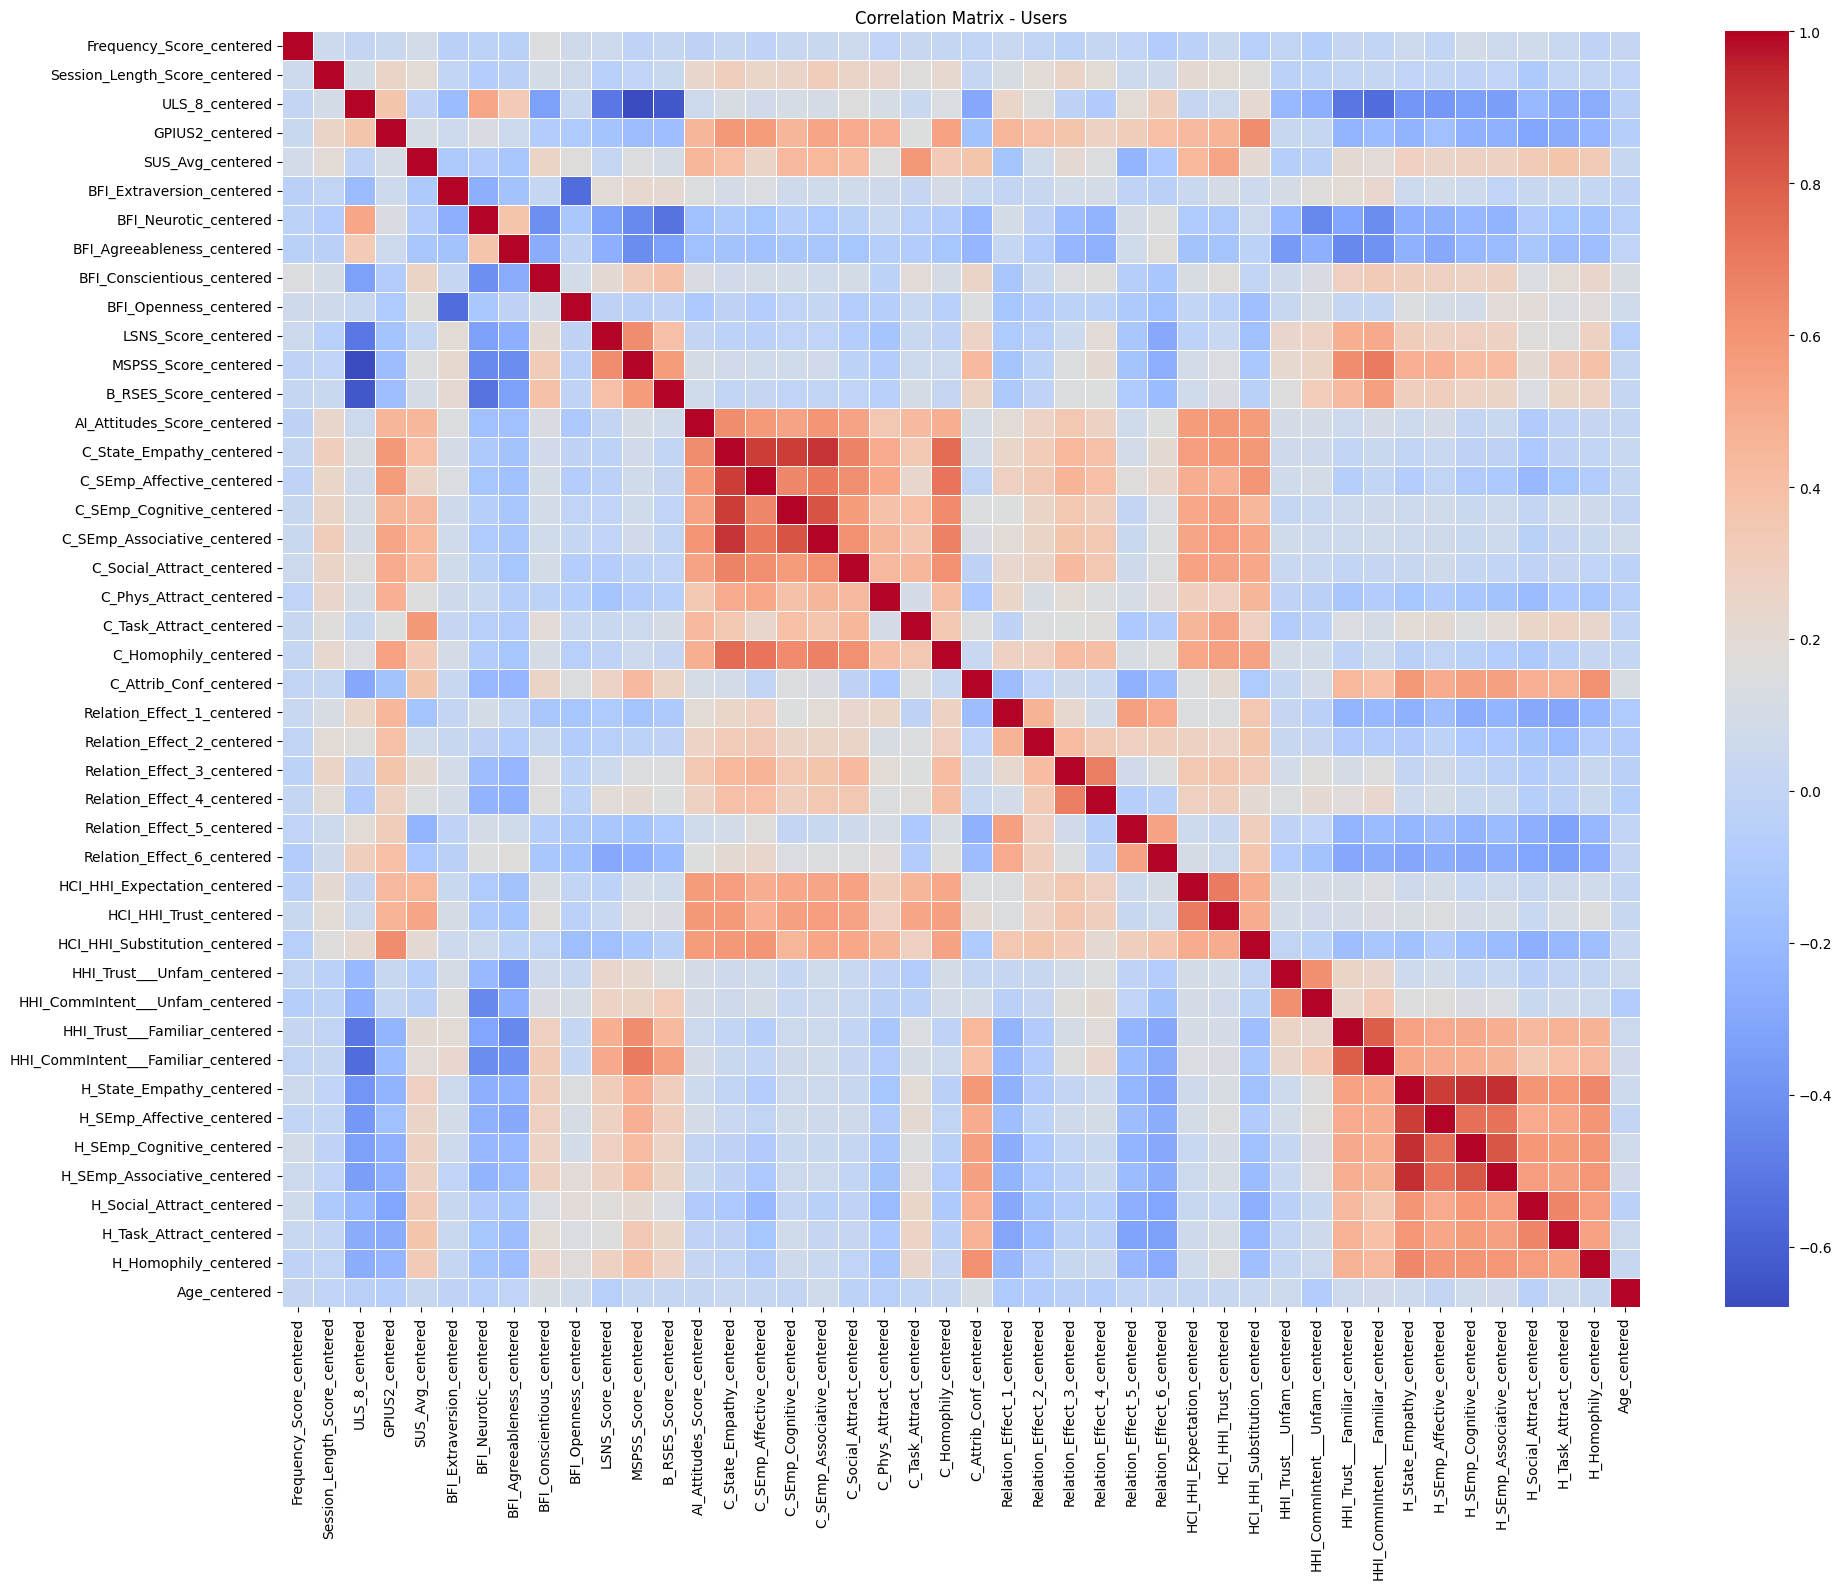

In [9]:
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Users')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
# Function to calculate p-value
def calculate_pvalue(r, n):
    if abs(r) == 1.0:
        return 0.0  # Perfect correlation, p-value is 0
    else:
        t = r * np.sqrt((n-2) / (1-r**2))
        p = 2 * (1 - stats.t.cdf(np.abs(t), n-2))
        return p

# Calculate p-values
n = df[var_centered].shape[0]  # sample size
p_values_matrix = correlation_matrix.applymap(lambda x: calculate_pvalue(x, n))

In [11]:
# Function to find significant correlations
def find_significant_correlations(correlation_matrix, p_values_matrix, key_variables, var_names, alpha=0.05):
    #significant_correlations = []
    for key_var in key_variables:
        print(f"\nSignificant correlations with {key_var}:")
        for var in var_names:
            if var != key_var:
                corr = correlation_matrix.loc[key_var, var]
                p_val = p_values_matrix.loc[key_var, var]
                if p_val < alpha:
                    # significant_correlations.append((key_var, var, corr, p_val))
                    print(f"{var}: correlation = {corr:.4f}, p-value = {p_val:.4f}")
    return #significant_correlation

# Function to visualize significant correlations
def significant_correlation_matrix(correlation_matrix, p_values_matrix, variables_of_interest, p_threshold=0.05, rename_dict=None, title=''):
    # Create a boolean mask for significant correlations
    significant_mask = (p_values_matrix < p_threshold) | (p_values_matrix.T < p_threshold)
    
    # Ensure variables of interest are always included
    for var in variables_of_interest:
        significant_mask[var] = True
        significant_mask.loc[var] = True
    
    # Apply the mask to get the significant correlation matrix
    significant_corr_matrix = correlation_matrix.loc[significant_mask.any(axis=1), significant_mask.any(axis=0)]

    # Create a copy for visualization
    viz_matrix = significant_corr_matrix.copy()

    # Rename the index and columns if a rename dictionary is provided
    if rename_dict:
        viz_matrix = viz_matrix.rename(index=rename_dict, columns=rename_dict)
        # Also rename the index and columns of the significant_mask
        significant_mask = significant_mask.rename(index=rename_dict, columns=rename_dict)
    
    # Create a mask for the heatmap to hide insignificant correlations
    heatmap_mask = ~significant_mask.loc[viz_matrix.index, viz_matrix.columns]
    
    # Set diagonal to False (to always show self-correlations)
    np.fill_diagonal(heatmap_mask.values, False)
    
    # Plot the heatmap
    plt.figure(figsize=(20, 16))
    sns.heatmap(viz_matrix, 
                mask=heatmap_mask,
                annot=False, 
                cmap='coolwarm', 
                vmin=-1, 
                vmax=1, 
                center=0,
                square=True,
                linewidths=0.5)
    plt.title(title + ' ' f'Correlation Matrix (p < {p_threshold})')
    plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
    plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal
    plt.tight_layout()
    plt.show()
    
    return significant_corr_matrix

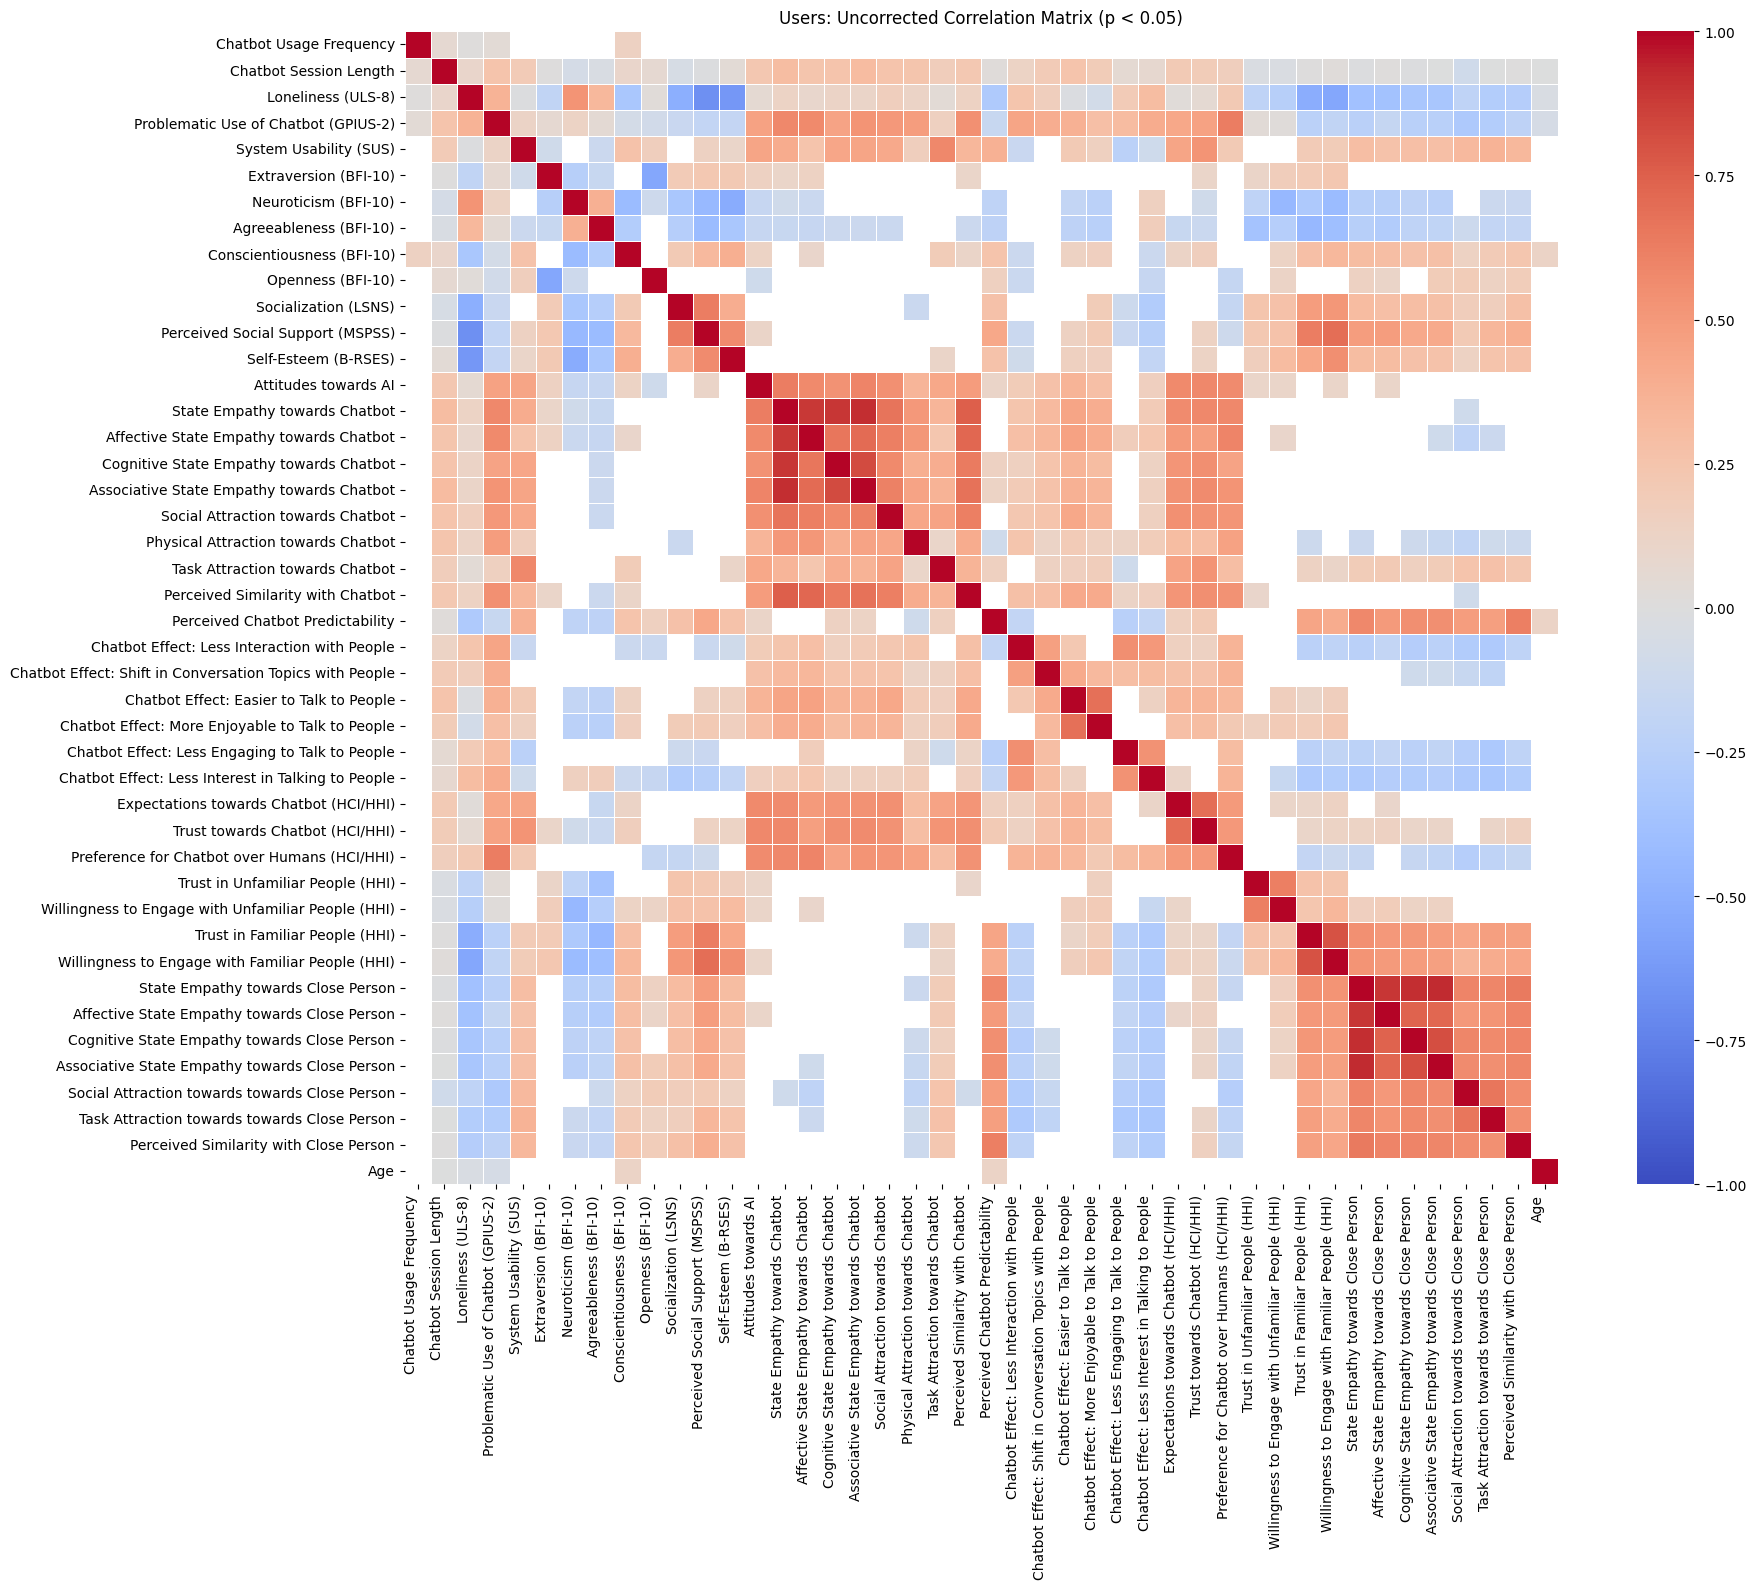

In [12]:
# Uncorrected significant correlations
significant_corr = significant_correlation_matrix(correlation_matrix, p_values_matrix, 
                                                key_variables, rename_dict=rename_dict, title='Users: Uncorrected')

In [13]:
def apply_benjamini_hochberg(correlation_matrix, p_values_matrix, alpha=0.05):
    # Flatten the p-values matrix
    p_values_flat = p_values_matrix.values.flatten()
    
    # Apply Benjamini-Hochberg correction
    rejected, p_values_corrected, _, _ = multipletests(p_values_flat, alpha=alpha, method='fdr_bh')
    
    # Reshape the corrected p-values back into a matrix
    p_values_corrected_matrix = p_values_corrected.reshape(p_values_matrix.shape)
    
    # Create a DataFrame with the corrected p-values
    p_values_corrected_df = pd.DataFrame(p_values_corrected_matrix, 
                                         index=p_values_matrix.index, 
                                         columns=p_values_matrix.columns)
    
    # Create a mask for significant correlations
    significant_mask = p_values_corrected_df < alpha
    
    # Apply the mask to the correlation matrix
    correlation_matrix_significant = correlation_matrix.where(significant_mask)
    
    return correlation_matrix_significant, p_values_corrected_df

# Significant correlations after BH correction
correlation_matrix_significant, p_values_corrected = apply_benjamini_hochberg(correlation_matrix, p_values_matrix)

# Print the number of significant correlations
print(f"Number of significant correlations before BH correction: {significant_corr.notna().sum().sum() // 2}")
print(f"Number of significant correlations after BH correction: {correlation_matrix_significant.notna().sum().sum() // 2}")

Number of significant correlations before BH correction: 968
Number of significant correlations after BH correction: 561


In [14]:
# Print significant correlations
find_significant_correlations(correlation_matrix_significant, p_values_corrected, key_variables, var_centered)


Significant correlations with Session_Length_Score_centered:
GPIUS2_centered: correlation = 0.2549, p-value = 0.0000
SUS_Avg_centered: correlation = 0.1962, p-value = 0.0002
AI_Attitudes_Score_centered: correlation = 0.2331, p-value = 0.0000
C_State_Empathy_centered: correlation = 0.3016, p-value = 0.0000
C_SEmp_Affective_centered: correlation = 0.2475, p-value = 0.0000
C_SEmp_Cognitive_centered: correlation = 0.2539, p-value = 0.0000
C_SEmp_Associative_centered: correlation = 0.3073, p-value = 0.0000
C_Social_Attract_centered: correlation = 0.2553, p-value = 0.0000
C_Phys_Attract_centered: correlation = 0.2438, p-value = 0.0000
C_Task_Attract_centered: correlation = 0.1787, p-value = 0.0007
C_Homophily_centered: correlation = 0.2213, p-value = 0.0000
Relation_Effect_1_centered: correlation = 0.1267, p-value = 0.0200
Relation_Effect_2_centered: correlation = 0.1955, p-value = 0.0002
Relation_Effect_3_centered: correlation = 0.2528, p-value = 0.0000
Relation_Effect_4_centered: correlat

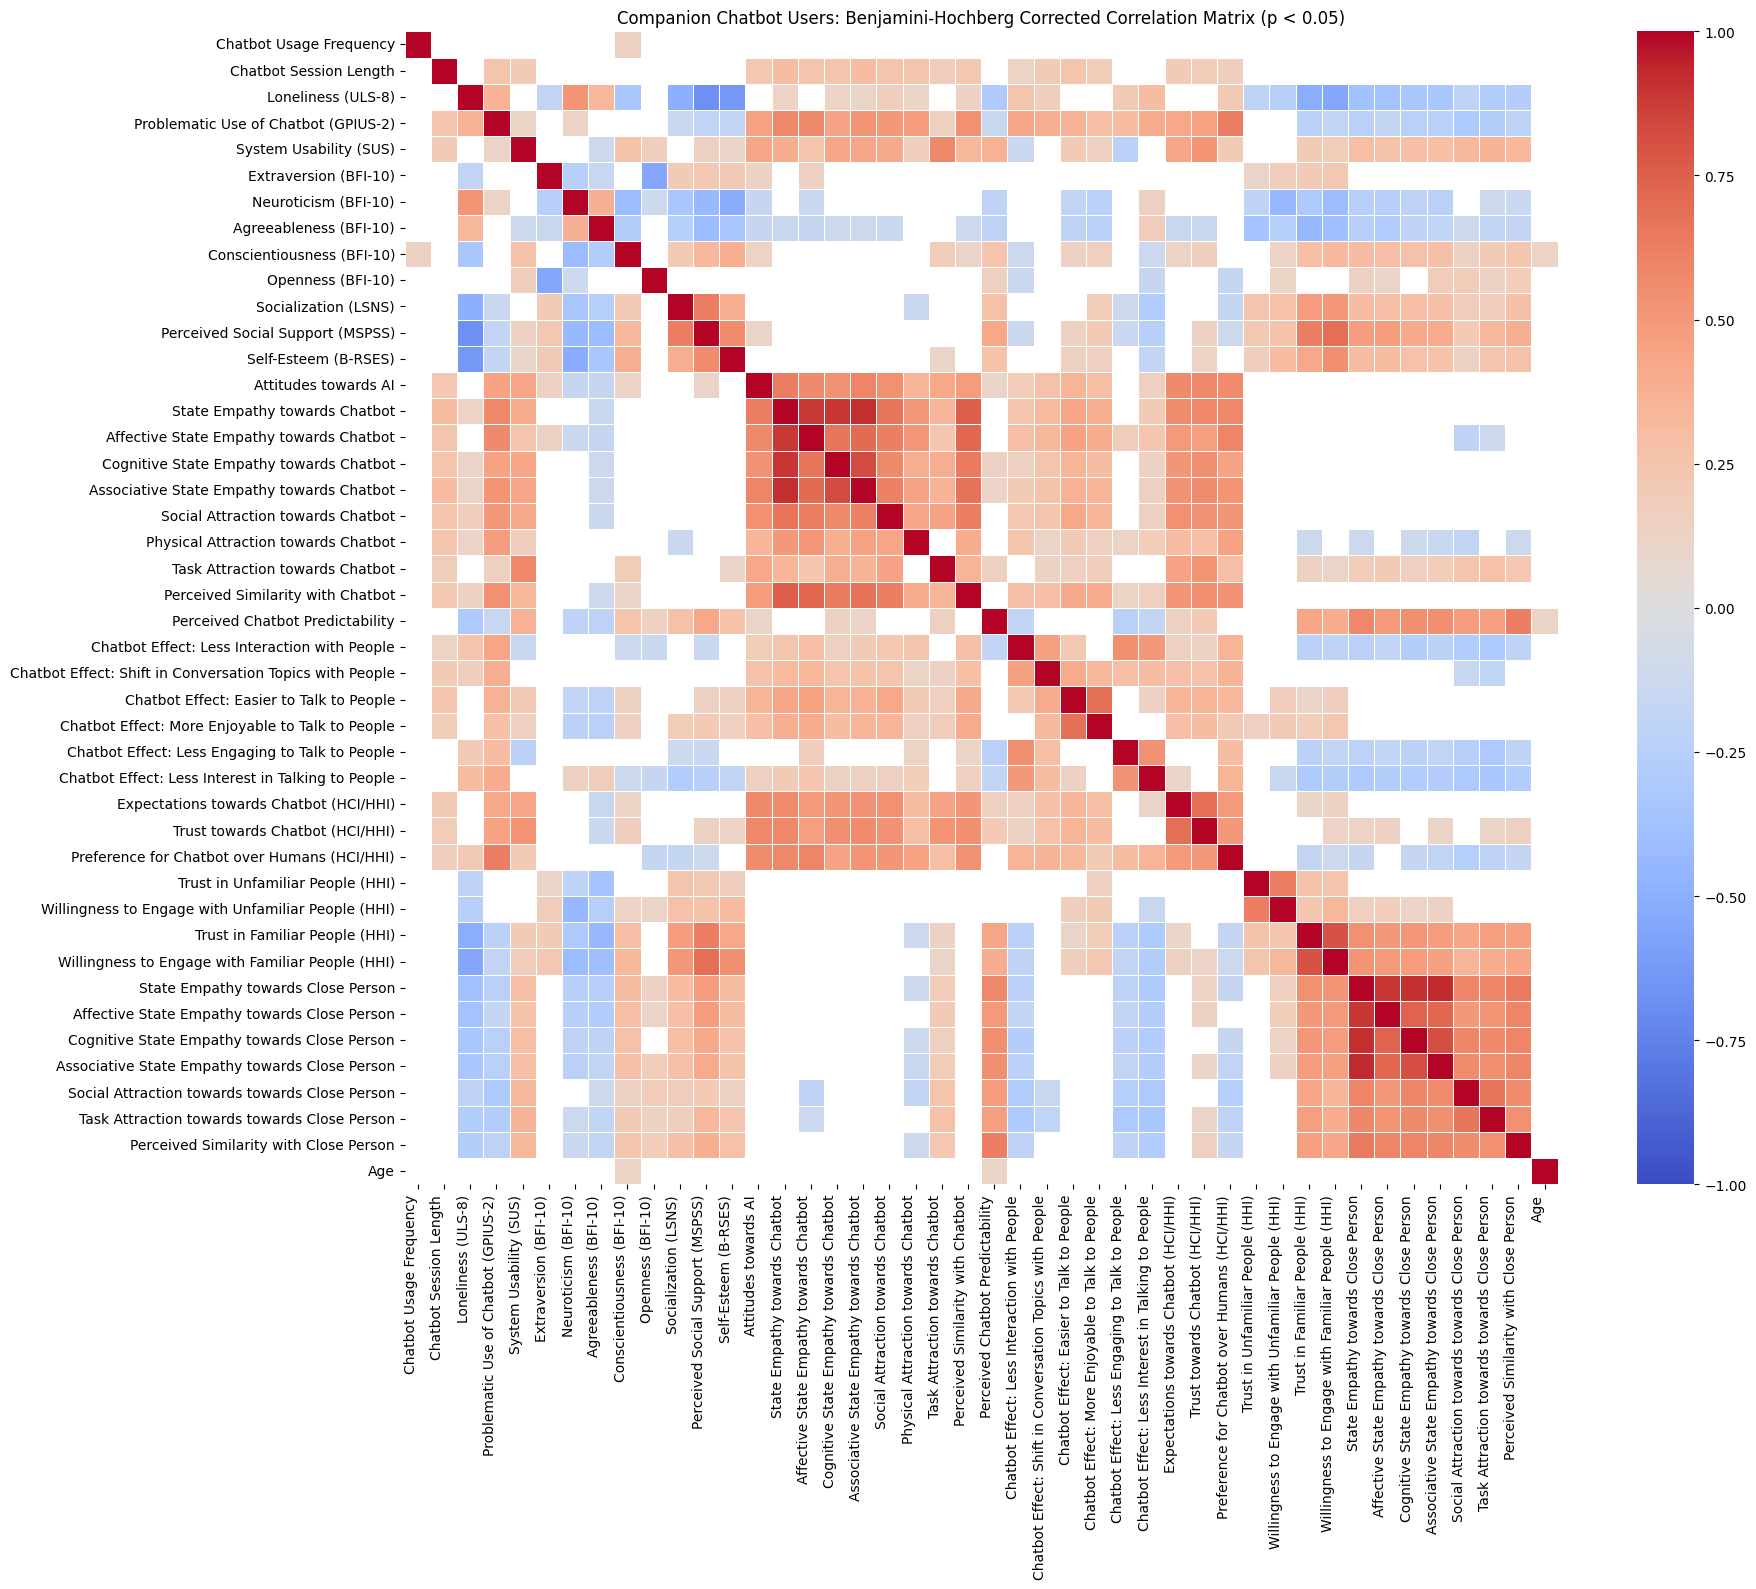

In [15]:
significant_corr = significant_correlation_matrix(correlation_matrix_significant, p_values_corrected, key_variables, rename_dict=rename_dict, title='Companion Chatbot Users: Benjamini-Hochberg Corrected')

# Clustering

In [16]:
def select_features(correlation_matrix, p_values_matrix, target_variables, p_threshold=0.05, corr_threshold=0.3):
    significant_features = set()
    for target in target_variables:
        significant_mask = (p_values_matrix[target] < p_threshold) & (abs(correlation_matrix[target]) >= corr_threshold)
        significant_features.update(correlation_matrix.index[significant_mask])
    
    significant_features = list(significant_features - set(target_variables))
    return significant_features

def perform_cluster_analysis(data, correlation_matrix, p_values_matrix, target_variables, user_specific_features=None, n_clusters_range=range(3, 18), max_features=10):
    # Select features based on significant correlations
    common_features = select_features(correlation_matrix, p_values_matrix, target_variables)
    
    # Add user-specific features if provided
    if user_specific_features:
        features = list(set(common_features + user_specific_features))  # Remove duplicates
    else:
        features = common_features
    
    print(f"Selected features: {features}")
    
    # Prepare the data, dropping any rows with NaN in the selected features
    X = data[features + target_variables].dropna()
    
    # If there are too many features, use PCA to reduce dimensionality
    if len(features) > max_features:
        print(f"Selected {len(features)} features. Reducing to {max_features} principal components.")
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X[features])
        pca = PCA(n_components=max_features)
        X_pca = pca.fit_transform(X_scaled)
        feature_names = [f'PC{i+1}' for i in range(max_features)]
        X_for_clustering = pd.DataFrame(X_pca, columns=feature_names, index=X.index)
    else:
        print(f"Using {len(features)} selected features for clustering.")
        X_for_clustering = X[features]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_for_clustering)

    # Perform elbow method
    wcss = []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Plot elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(n_clusters_range, wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    # Calculate silhouette scores
    silhouette_scores = []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(n_clusters_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different k')
    plt.show()

    # Ask user for the optimal number of clusters
    optimal_clusters = int(input("Based on the elbow plot and silhouette scores, enter the optimal number of clusters: "))

    # Perform K-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    X['Cluster'] = kmeans.fit_predict(X_scaled)

    # Visualize the clusters using the first two features or principal components
    plt.figure(figsize=(10, 6))
    x_col, y_col = X_for_clustering.columns[0], X_for_clustering.columns[1]
    plot_data = pd.concat([X_for_clustering, X['Cluster']], axis=1)
    sns.scatterplot(data=plot_data, x=x_col, y=y_col, hue='Cluster', palette='deep')
    plt.title(f'Cluster Analysis: {x_col} vs {y_col}')
    plt.show()

    # Analyze cluster characteristics
    if len(features) > max_features:
        cluster_means = X.groupby('Cluster')[target_variables].mean()
        print("Cluster Means (only for target variables due to PCA):")
    else:
        cluster_means = X.groupby('Cluster')[features + target_variables].mean()
        print("Cluster Means:")
    print(cluster_means)

    return X, cluster_means, features

Selected features: ['Relation_Effect_2_centered', 'H_SEmp_Cognitive_centered', 'HCI_HHI_Trust_centered', 'H_State_Empathy_centered', 'Relation_Effect_4_centered', 'C_SEmp_Affective_centered', 'C_Attrib_Conf_centered', 'C_SEmp_Associative_centered', 'C_Task_Attract_centered', 'Relation_Effect_5_centered', 'H_SEmp_Associative_centered', 'Relation_Effect_3_centered', 'H_Social_Attract_centered', 'Relation_Effect_1_centered', 'BFI_Agreeableness_centered', 'Relation_Effect_6_centered', 'C_Phys_Attract_centered', 'C_State_Empathy_centered', 'B_RSES_Score_centered', 'C_Social_Attract_centered', 'BFI_Neurotic_centered', 'LSNS_Score_centered', 'HHI_CommIntent___Familiar_centered', 'HCI_HHI_Expectation_centered', 'HHI_Trust___Familiar_centered', 'H_SEmp_Affective_centered', 'C_SEmp_Cognitive_centered', 'HCI_HHI_Substitution_centered', 'Frequency_Score_centered', 'C_Homophily_centered', 'BFI_Conscientious_centered', 'MSPSS_Score_centered', 'AI_Attitudes_Score_centered']
Selected 33 features. Redu

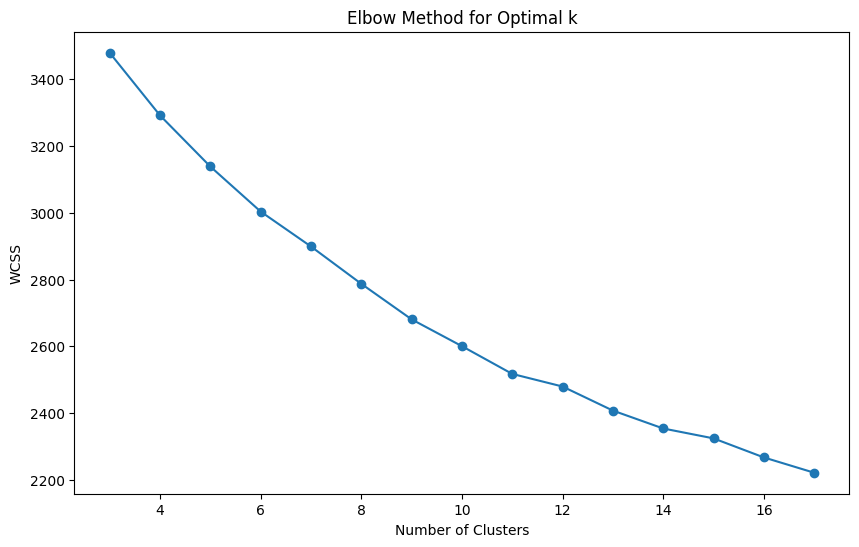

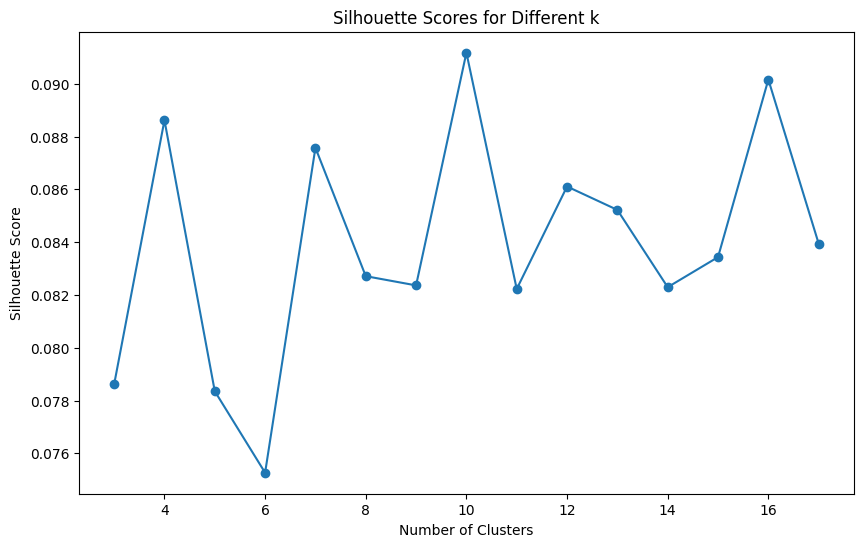

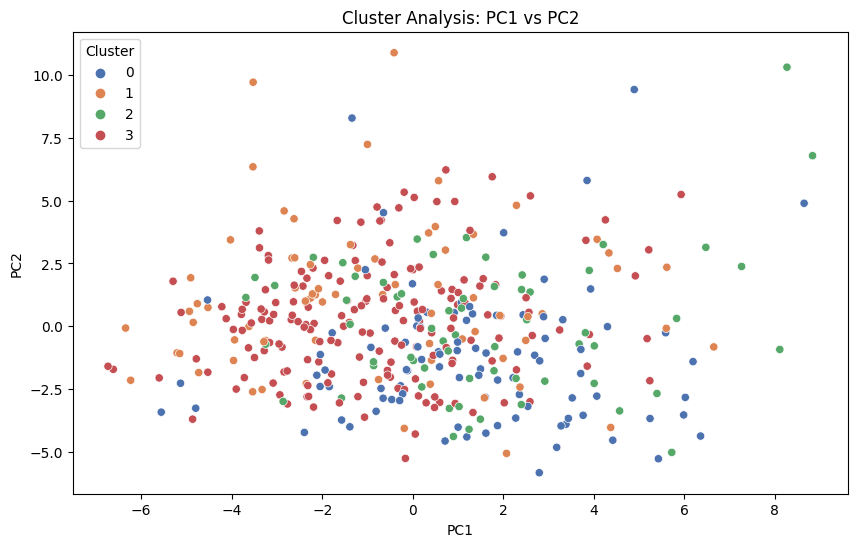

Cluster Means (only for target variables due to PCA):
         Session_Length_Score_centered  ULS_8_centered  GPIUS2_centered
Cluster                                                                
0                            -0.254962       -0.309739        -0.538581
1                             0.307543        0.040829         0.365664
2                            -0.035158        0.095558        -0.312828
3                             0.019471        0.115917         0.246912


In [17]:
user_specific_features = ['Frequency Score', 'C State Empathy', 'C SEmp Affective', 'C SEmp Cognitive', 
                            'C SEmp Associative', 'C Social Attract', 'C Phys Attract', 'C Task Attract', 
                            'C Homophily', 'C Attrib Conf', 'HCI-HHI Expectation', 'HCI-HHI Trust', 
                            'HCI-HHI Substitution',
                            'Relation_Effect_1', 'Relation_Effect_2', 'Relation_Effect_3', 'Relation_Effect_4', 
                            'Relation_Effect_5', 'Relation_Effect_6']

# Replace spaces and hyphens in variable names
user_specific_features = [var.replace(' ', '_').replace('-', '_') for var in user_specific_features]
user_specific_features = [var + '_centered' for var in user_specific_features]

clustered_data, cluster_characteristics, selected_features = perform_cluster_analysis(
    df, correlation_matrix, p_values_matrix, key_variables, user_specific_features
)

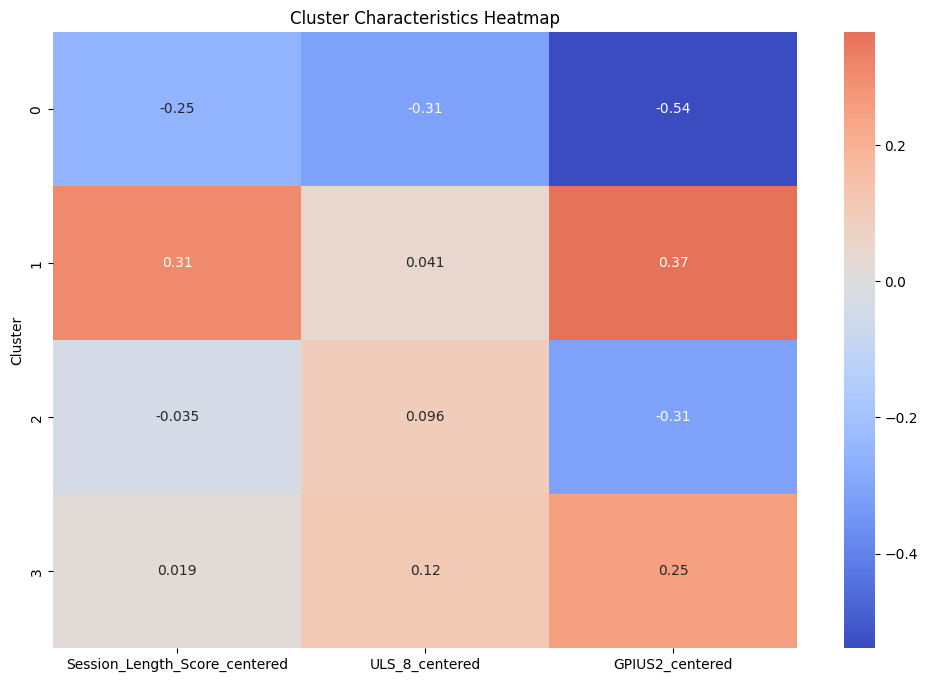

Selected features for clustering: ['Relation_Effect_2_centered', 'H_SEmp_Cognitive_centered', 'HCI_HHI_Trust_centered', 'H_State_Empathy_centered', 'Relation_Effect_4_centered', 'C_SEmp_Affective_centered', 'C_Attrib_Conf_centered', 'C_SEmp_Associative_centered', 'C_Task_Attract_centered', 'Relation_Effect_5_centered', 'H_SEmp_Associative_centered', 'Relation_Effect_3_centered', 'H_Social_Attract_centered', 'Relation_Effect_1_centered', 'BFI_Agreeableness_centered', 'Relation_Effect_6_centered', 'C_Phys_Attract_centered', 'C_State_Empathy_centered', 'B_RSES_Score_centered', 'C_Social_Attract_centered', 'BFI_Neurotic_centered', 'LSNS_Score_centered', 'HHI_CommIntent___Familiar_centered', 'HCI_HHI_Expectation_centered', 'HHI_Trust___Familiar_centered', 'H_SEmp_Affective_centered', 'C_SEmp_Cognitive_centered', 'HCI_HHI_Substitution_centered', 'Frequency_Score_centered', 'C_Homophily_centered', 'BFI_Conscientious_centered', 'MSPSS_Score_centered', 'AI_Attitudes_Score_centered']


In [18]:
# Visualize cluster characteristics
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_characteristics, annot=True, cmap='coolwarm', center=0)
plt.title('Cluster Characteristics Heatmap')
plt.show()

print("Selected features for clustering:", selected_features)

In [19]:
def create_detailed_heatmap(cluster_data, features, target_variables):
    # Calculate mean values for all features and target variables
    cluster_means = cluster_data.groupby('Cluster')[features + target_variables].mean()
    
    # Create a heatmap
    plt.figure(figsize=(20, len(cluster_means.columns) * 0.5))
    sns.heatmap(cluster_means, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Detailed Cluster Characteristics Heatmap')
    plt.ylabel('Cluster')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()
    
    return cluster_means

def calculate_z_scores(cluster_means):
    return (cluster_means - cluster_means.mean()) / cluster_means.std()

def identify_similar_clusters(z_scores, threshold=1.0):
    # Calculate pairwise distances between clusters
    distances = pdist(z_scores)
    linkage_matrix = linkage(distances, method='ward')
    
    # Create dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title('Cluster Similarity Dendrogram')
    plt.xlabel('Cluster')
    plt.ylabel('Distance')
    plt.show()
    
    # Find similar clusters based on threshold
    similar_clusters = []
    for i in range(len(z_scores)):
        for j in range(i+1, len(z_scores)):
            distance = np.linalg.norm(z_scores.iloc[i] - z_scores.iloc[j])
            if distance < threshold:
                similar_clusters.append((z_scores.index[i], z_scores.index[j], distance))
    
    return similar_clusters

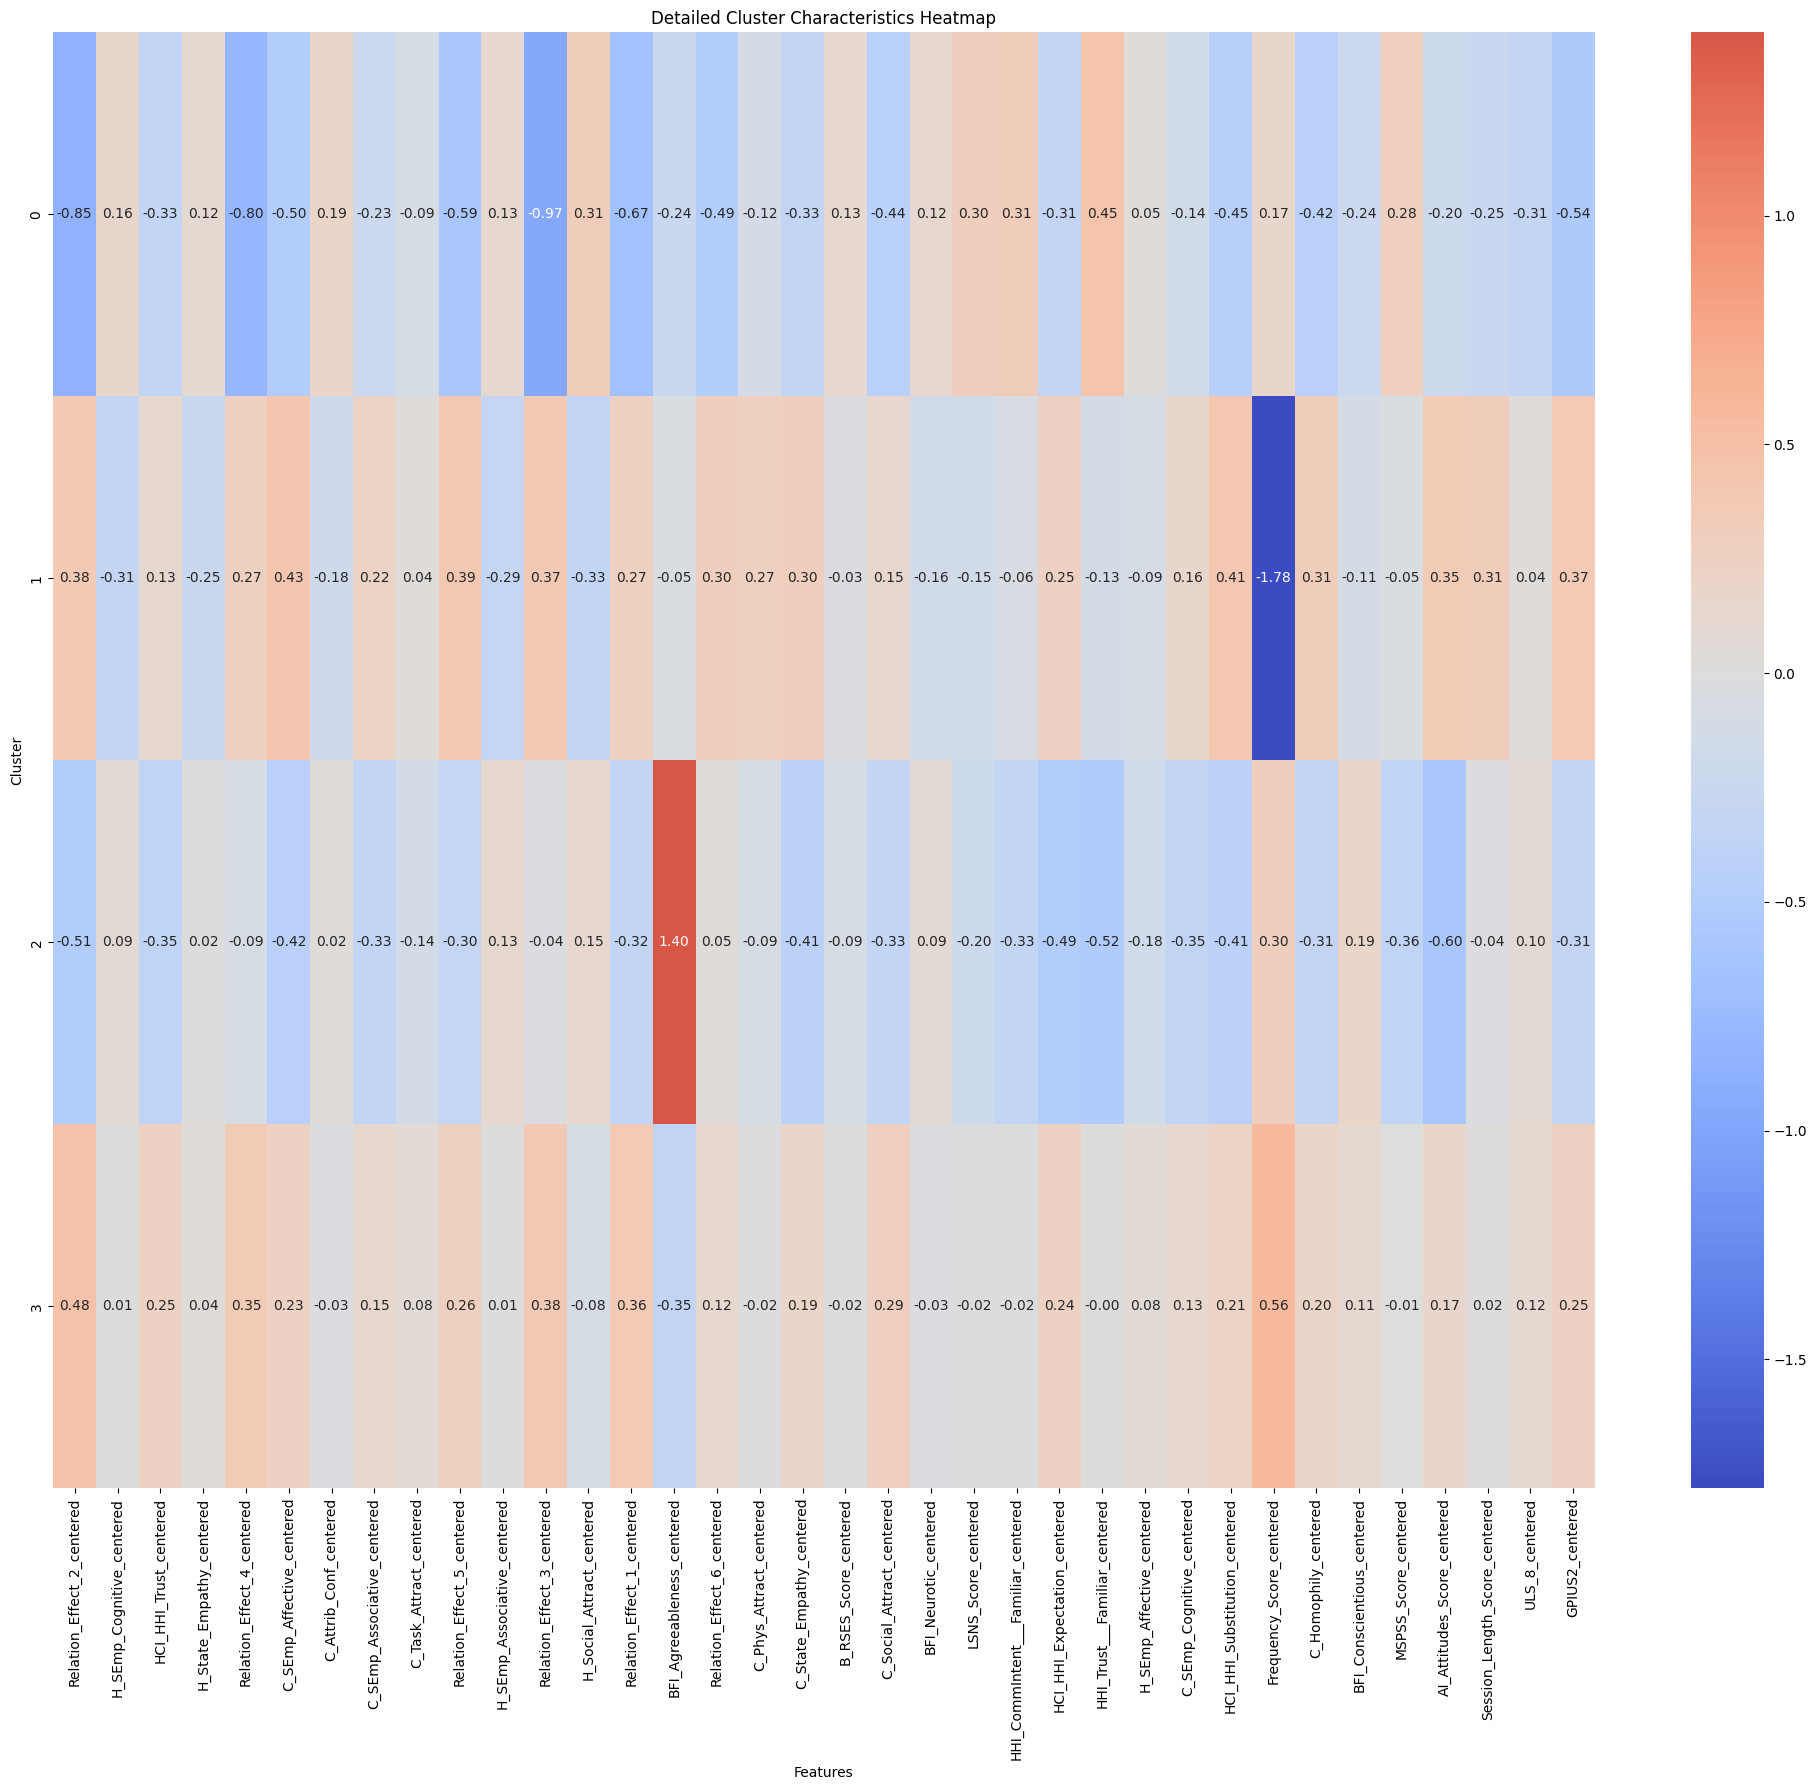

In [20]:
cluster_means = create_detailed_heatmap(clustered_data, selected_features, key_variables)

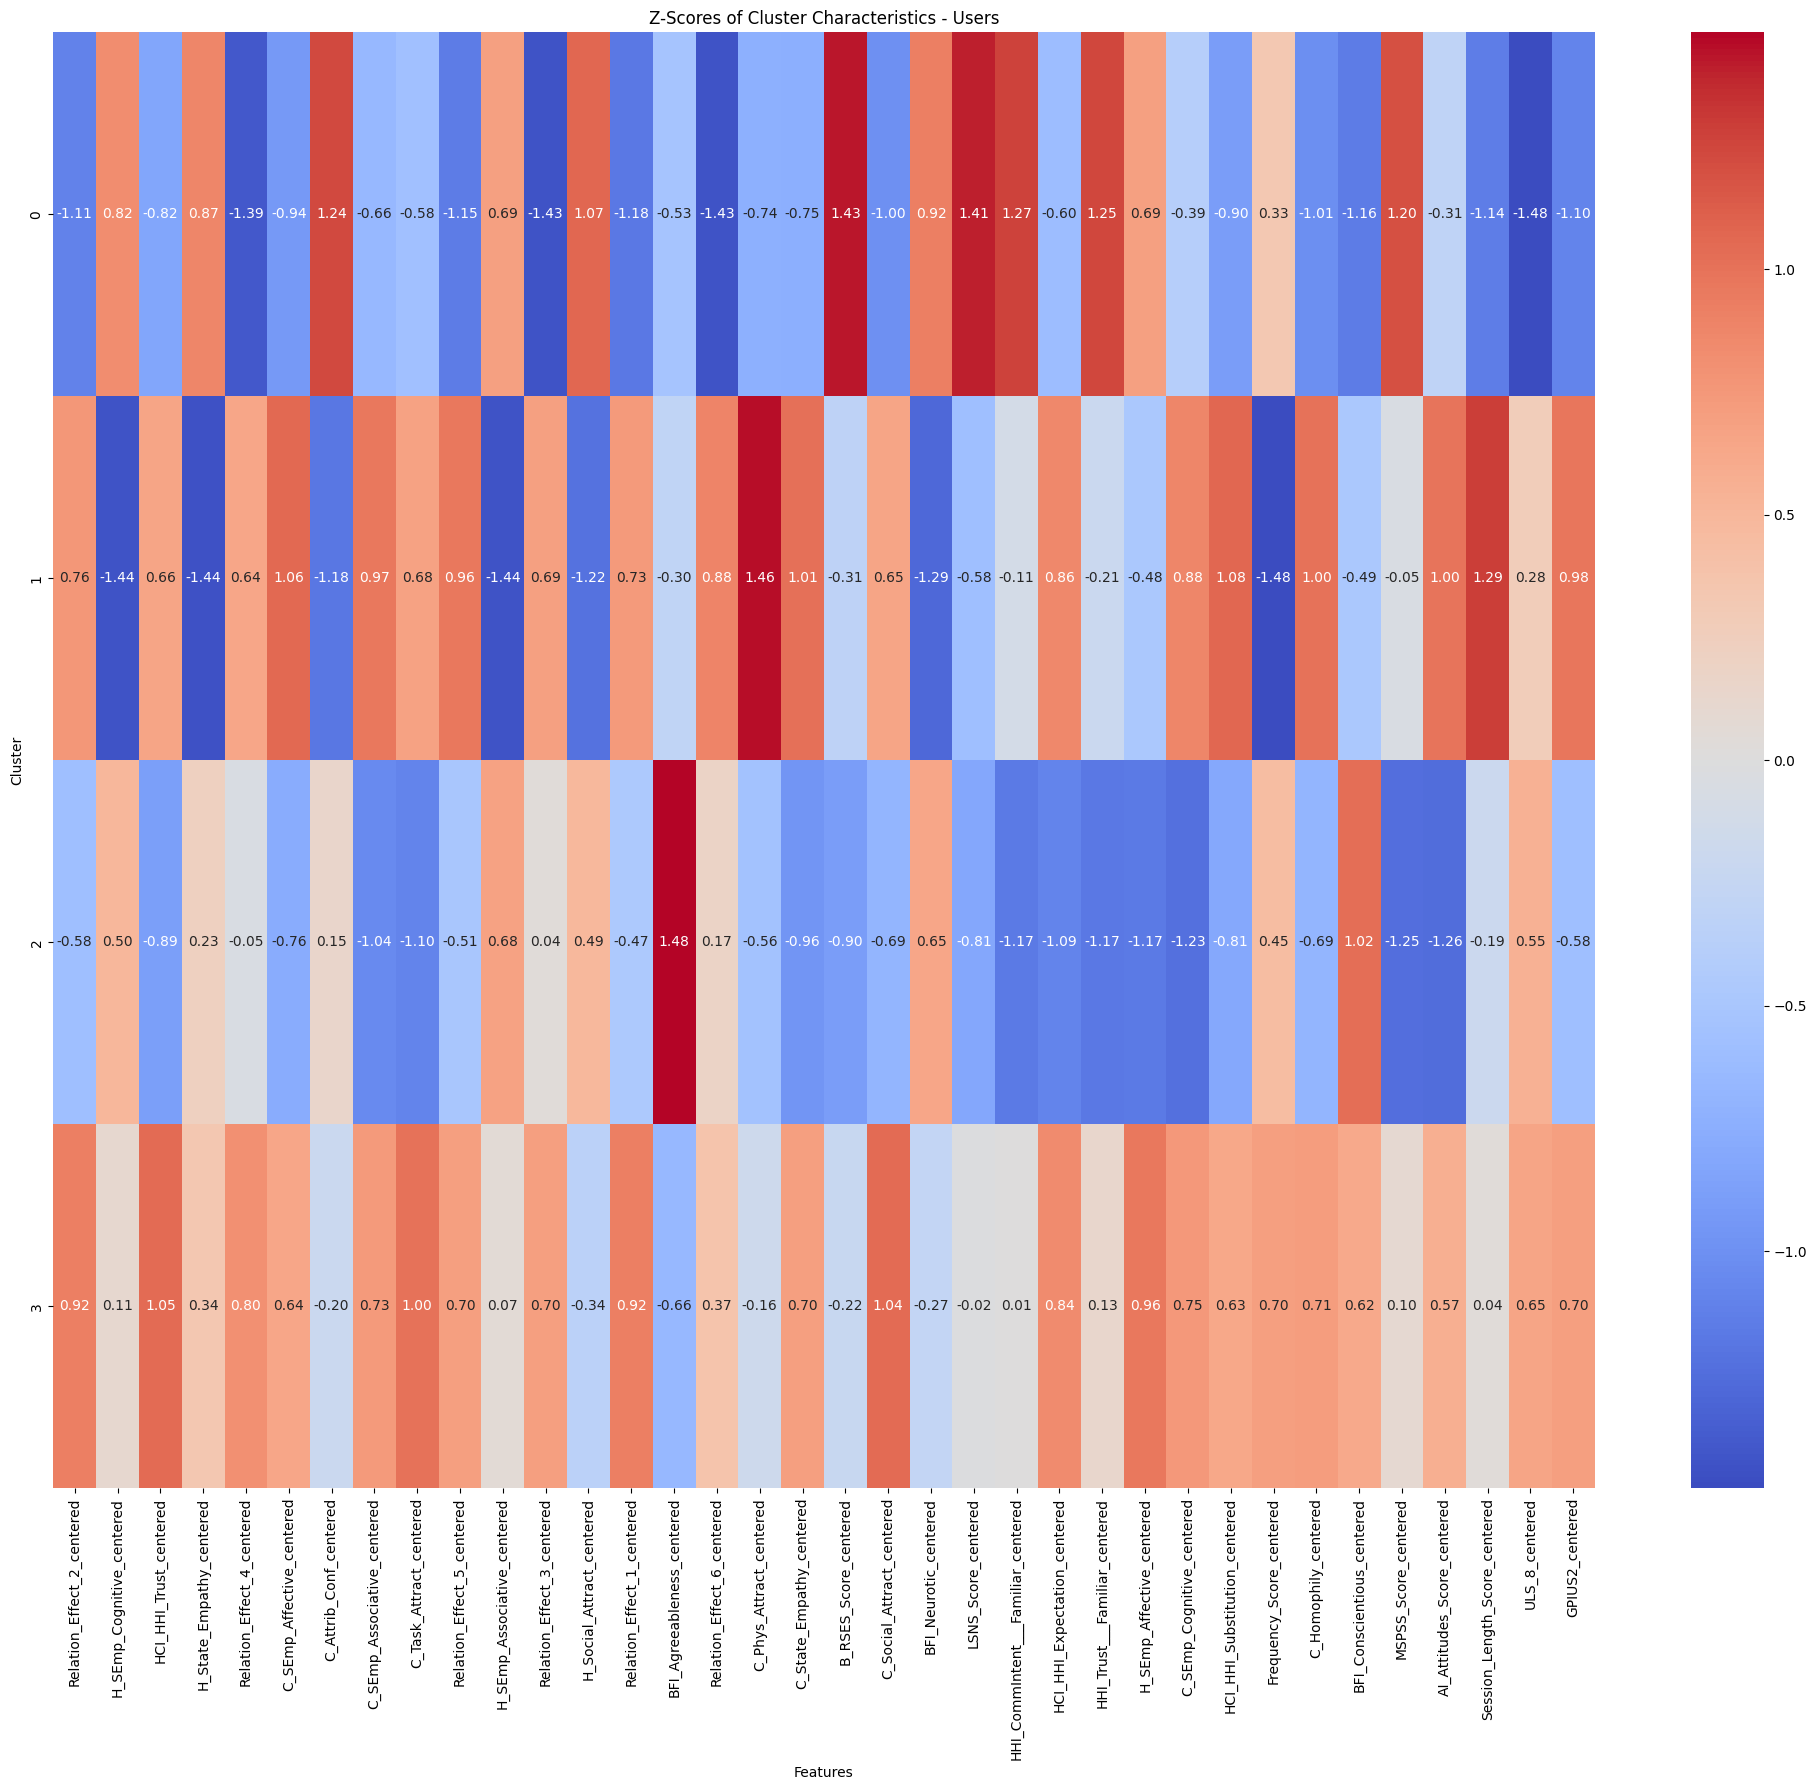

In [21]:
# Calculate z-scores for easier comparison
z_scores = calculate_z_scores(cluster_means)

# Create heatmap of z-scores
plt.figure(figsize=(20, len(z_scores.columns) * 0.5))
sns.heatmap(z_scores, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Z-Scores of Cluster Characteristics - Users')
plt.ylabel('Cluster')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

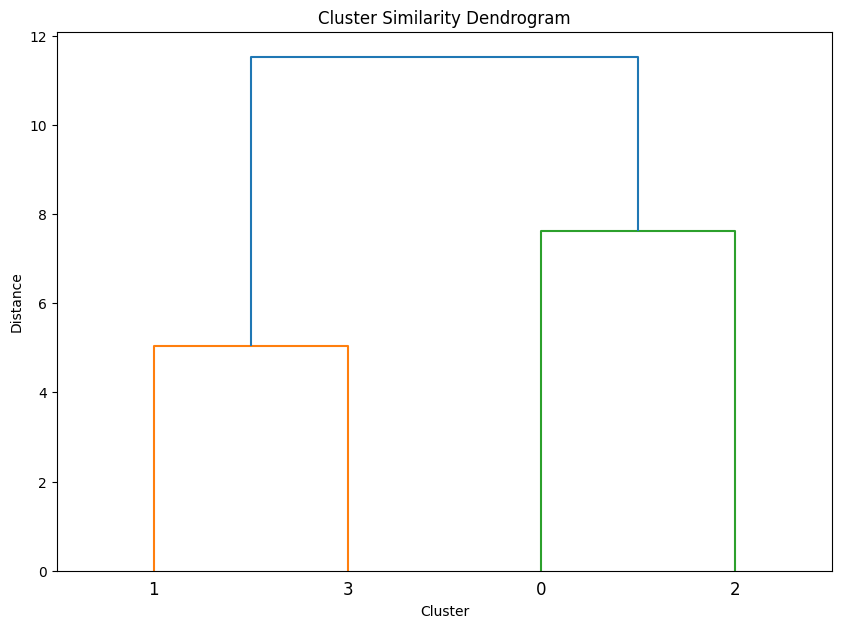

Similar clusters (cluster1, cluster2, distance):


In [22]:
# Identify similar clusters
similar_clusters = identify_similar_clusters(z_scores, threshold=1.5)

print("Similar clusters (cluster1, cluster2, distance):")
for cluster1, cluster2, distance in similar_clusters:
    print(f"Cluster {cluster1} and Cluster {cluster2}: Distance = {distance:.2f}")

In [23]:
# Characterize clusters
def characterize_clusters(clustered_data,cluster_means, z_scores, key_variables):
    cluster_sizes = clustered_data['Cluster'].value_counts().sort_index()
    for cluster in cluster_means.index:
        cluster_size = cluster_sizes[cluster]
        total_samples = len(clustered_data)
        cluster_percentage = (cluster_size / total_samples) * 100
        
        print(f"\nCluster {cluster} profile:")
        print(f"Size: {cluster_size} samples ({cluster_percentage:.2f}% of total)")
        
        # Always include key variables
        for feature in key_variables:
            value = cluster_means.loc[cluster, feature]
            z_score = z_scores.loc[cluster, feature]
            level = "high" if z_score > 1 else "low" if z_score < -1 else "average"
            print(f"- {feature}: {level.capitalize()} ({value:.2f}, z-score: {z_score:.2f})")
        
        # Include other features with notable z-scores
        for feature in cluster_means.columns:
            if feature not in key_variables:
                value = cluster_means.loc[cluster, feature]
                z_score = z_scores.loc[cluster, feature]
                if abs(z_score) > 1:
                    level = "high" if z_score > 0 else "low"
                    print(f"- {feature}: {level.capitalize()} ({value:.2f}, z-score: {z_score:.2f})")

characterize_clusters(clustered_data, cluster_means, z_scores, key_variables)


Cluster 0 profile:
Size: 94 samples (23.27% of total)
- Session_Length_Score_centered: Low (-0.25, z-score: -1.14)
- ULS_8_centered: Low (-0.31, z-score: -1.48)
- GPIUS2_centered: Low (-0.54, z-score: -1.10)
- Relation_Effect_2_centered: Low (-0.85, z-score: -1.11)
- Relation_Effect_4_centered: Low (-0.80, z-score: -1.39)
- C_Attrib_Conf_centered: High (0.19, z-score: 1.24)
- Relation_Effect_5_centered: Low (-0.59, z-score: -1.15)
- Relation_Effect_3_centered: Low (-0.97, z-score: -1.43)
- H_Social_Attract_centered: High (0.31, z-score: 1.07)
- Relation_Effect_1_centered: Low (-0.67, z-score: -1.18)
- Relation_Effect_6_centered: Low (-0.49, z-score: -1.43)
- B_RSES_Score_centered: High (0.13, z-score: 1.43)
- C_Social_Attract_centered: Low (-0.44, z-score: -1.00)
- LSNS_Score_centered: High (0.30, z-score: 1.41)
- HHI_CommIntent___Familiar_centered: High (0.31, z-score: 1.27)
- HHI_Trust___Familiar_centered: High (0.45, z-score: 1.25)
- C_Homophily_centered: Low (-0.42, z-score: -1.01

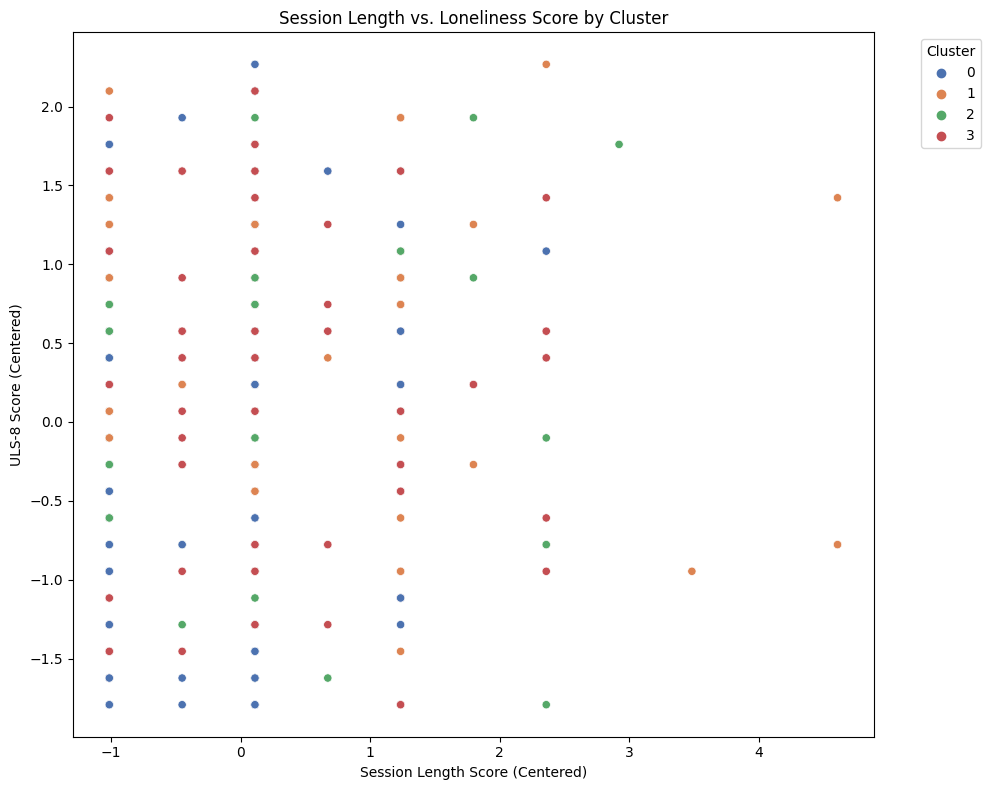

In [24]:
# Scatter plot of Session Length vs. ULS-8 scores, colored by cluster
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=clustered_data, x='Session_Length_Score_centered', y='ULS_8_centered', hue='Cluster', palette='deep')
plt.title('Session Length vs. Loneliness Score by Cluster')
plt.xlabel('Session Length Score (Centered)')
plt.ylabel('ULS-8 Score (Centered)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

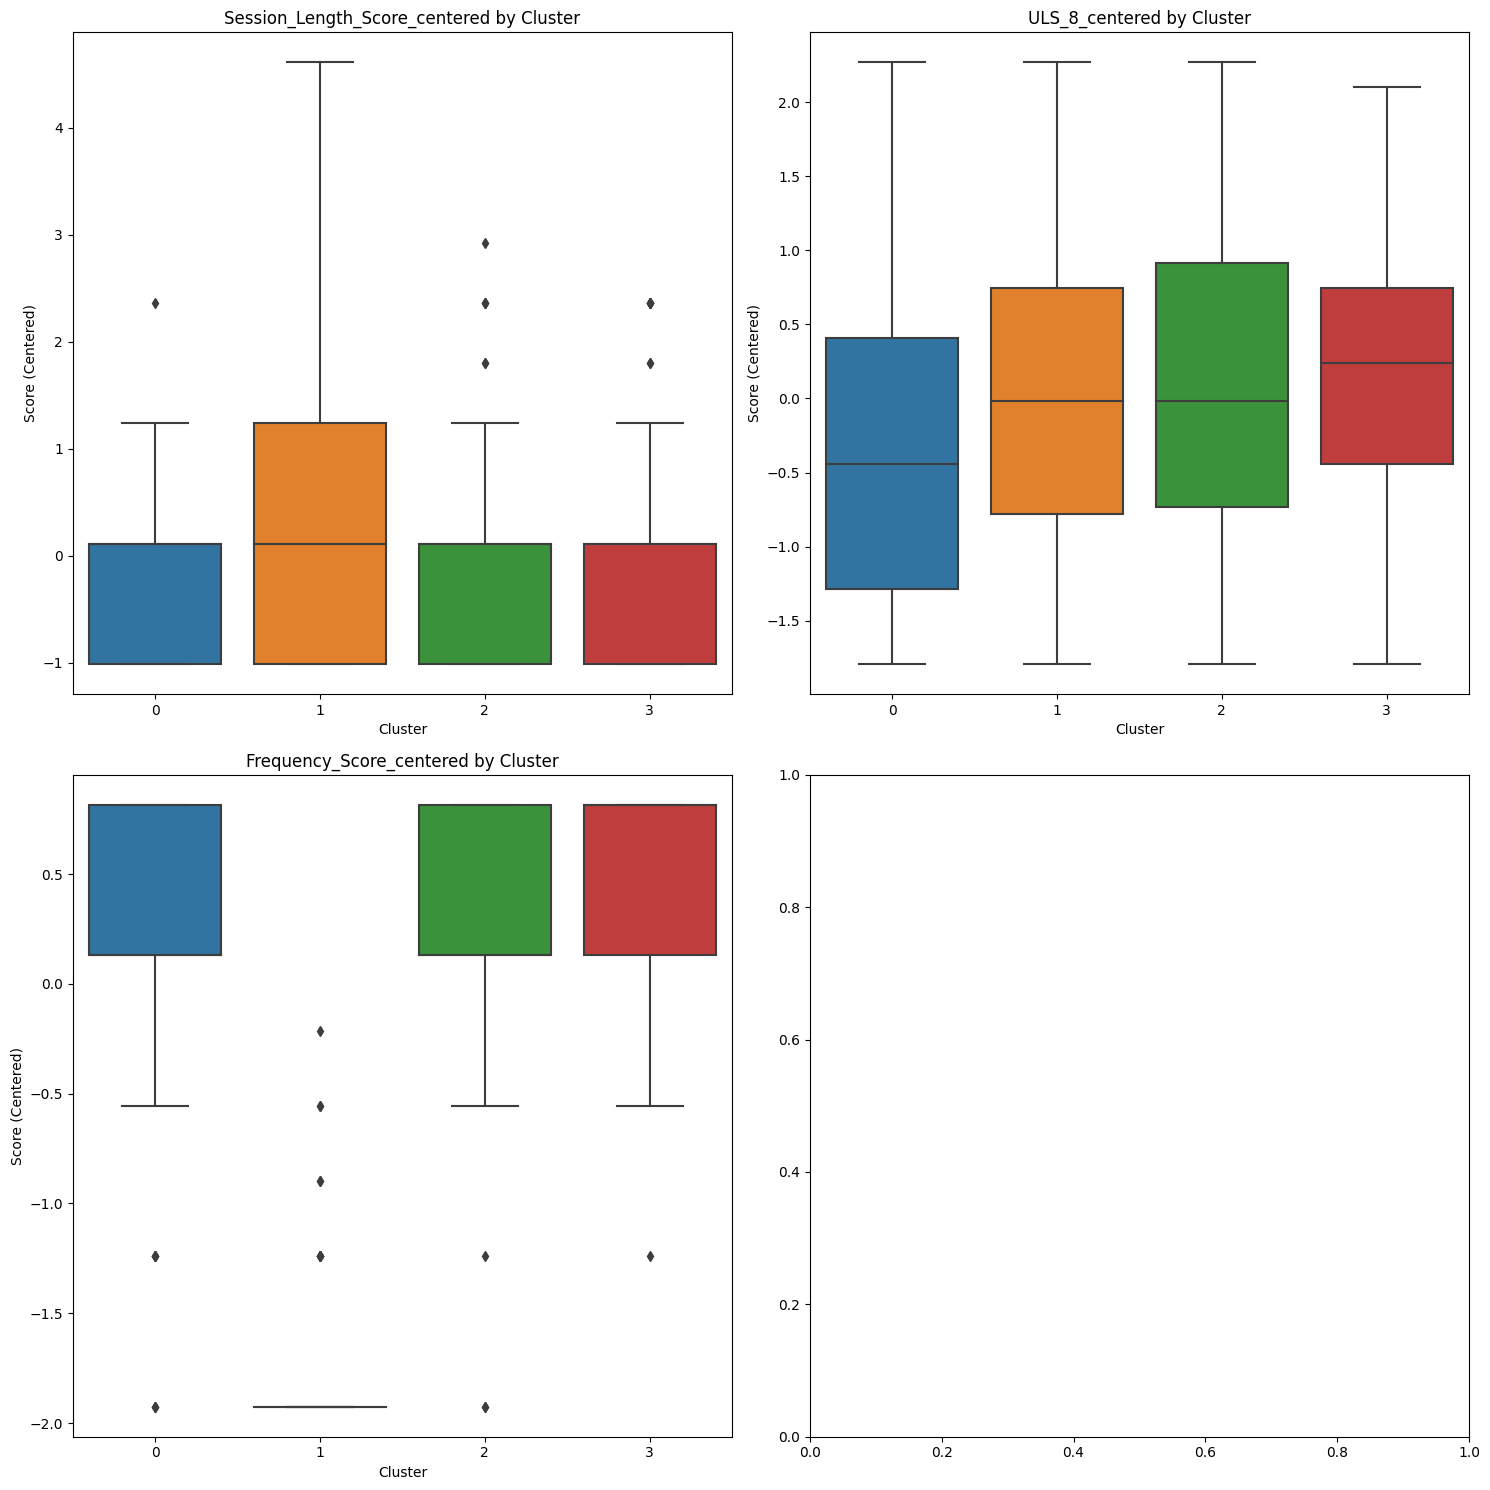

In [25]:
# Box plots for key variables across clusters
key_variables = ['Session_Length_Score_centered', 'ULS_8_centered', 'Frequency_Score_centered']

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

for i, var in enumerate(key_variables):
    sns.boxplot(data=clustered_data, x='Cluster', y=var, ax=axes[i])
    axes[i].set_title(f'{var} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Score (Centered)')

plt.tight_layout()
plt.show()

# Statistical Tests

In [26]:
def check_normality(data):
    _, p_value = shapiro(data)
    return p_value > 0.05  # Return True if data is likely normal (p > 0.05)

def perform_anova_or_kruskal(df, variable):
    groups = [group[variable].values for name, group in df.groupby('Cluster')]
    
    # Check normality for each group
    normality = all(check_normality(group) for group in groups)
    
    if normality:
        # Perform one-way ANOVA
        f_statistic, p_value = stats.f_oneway(*groups)
        test_name = "ANOVA"
        
        # Post-hoc Tukey's test
        tukey_results = pairwise_tukeyhsd(df[variable], df['Cluster'])
        
    else:
        # Perform Kruskal-Wallis H-test
        h_statistic, p_value = stats.kruskal(*groups)
        test_name = "Kruskal-Wallis"
        tukey_results = None  # Tukey's test is not applicable for non-parametric tests
    
    return test_name, p_value, tukey_results

In [27]:
variables = ['Session_Length_Score_centered', 'ULS_8_centered', 'Frequency_Score_centered', 'MSPSS_Score_centered']

for var in variables:
    test_name, p_value, tukey_results = perform_anova_or_kruskal(clustered_data, var)
    print(f"{test_name} results for {var}:")
    print(f"p-value: {p_value}")
    
    if tukey_results is not None:
        print("Post-hoc Tukey's test results:")
        print(tukey_results)
    print("\n")

# Silhouette Analysis
X = clustered_data[variables]
silhouette_avg = silhouette_score(X, clustered_data['Cluster'])
print(f"The average silhouette score is: {silhouette_avg}")

Kruskal-Wallis results for Session_Length_Score_centered:
p-value: 0.02402334093451213


Kruskal-Wallis results for ULS_8_centered:
p-value: 0.00447413660296424


Kruskal-Wallis results for Frequency_Score_centered:
p-value: 2.5768186001322367e-45


Kruskal-Wallis results for MSPSS_Score_centered:
p-value: 0.0006521870663397939


The average silhouette score is: 0.03595301861746184


In [28]:
manova = MANOVA.from_formula('Session_Length_Score_centered + ULS_8_centered + Frequency_Score_centered ~ C(Cluster)', data=clustered_data)
print("MANOVA results:")
print(manova.mv_test())

MANOVA results:
                   Multivariate linear model
                                                               
---------------------------------------------------------------
         Intercept        Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.9414 3.0000 398.0000  8.2585 0.0000
           Pillai's trace 0.0586 3.0000 398.0000  8.2585 0.0000
   Hotelling-Lawley trace 0.0623 3.0000 398.0000  8.2585 0.0000
      Roy's greatest root 0.0623 3.0000 398.0000  8.2585 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
       C(Cluster)       Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.2473 9.0000  968.7780  83.4740 0.0000
         Pillai's trace 0.7848 9.0000 1200.

In [29]:
def box_m_test(df, variables, group_variable):
    groups = df[group_variable].unique()
    k = len(groups)
    v = len(variables)
    n = len(df)
    n_i = df[group_variable].value_counts().sort_index().values
    
    S_pooled = np.zeros((v, v))
    for group in groups:
        S_i = np.cov(df[df[group_variable] == group][variables].T)
        S_pooled += (n_i[groups == group][0] - 1) * S_i
    S_pooled /= (n - k)
    
    M = (n - k) * np.log(np.linalg.det(S_pooled))
    for group in groups:
        S_i = np.cov(df[df[group_variable] == group][variables].T)
        M -= (n_i[groups == group][0] - 1) * np.log(np.linalg.det(S_i))
    
    c = (sum(1 / (n_i[i] - 1) for i in range(k)) - 1 / (n - k)) * \
        (2 * v**2 + 3 * v - 1) / (6 * (v + 1) * (k - 1))
    chi2 = M * (1 - c)
    df = int((v * (v + 1) * (k - 1)) / 2)  # Ensure df is an integer
    p_value = 1 - stats.chi2.cdf(chi2, df)
    
    return chi2, p_value

# Ensure 'Cluster' column is categorical
clustered_data['Cluster'] = clustered_data['Cluster'].astype('category')

# List of variables to analyze
variables = ['Session_Length_Score_centered', 'ULS_8_centered', 'Frequency_Score_centered', 'MSPSS_Score_centered']

# Perform Box's M-test
chi2, p_value = box_m_test(clustered_data, variables, 'Cluster')
print("\nBox's M-test for homogeneity of covariance matrices:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")


Box's M-test for homogeneity of covariance matrices:
Chi-square statistic: 147.88886107029484
p-value: 0.0
